Здесь лежат сообщения о текущей локализации и флаг, включен ли автопилот (**control_switch_on = true**, если включен) во время одного из настроечных проездов беспилотного автмобиля в Лас-Вегасе. Посчитайте расстояния, которые он проехал в автономном и в ручном режиме.


In [1]:
# Смотрим имеющиеся данные - большая строка
data = open('/home/ostrebko/Data_task/Yandex_car/data.bin', 'r').read()
data

'{"control_switch_on":false,"ts":1546824945154817766}\n{"geo":{"lat":36.104064590834020976,"lon":-115.16390984327611591},"ts":1546825180350798251}\n{"control_switch_on":false,"ts":1546824933503850568}\n{"geo":{"lat":36.108299424669787925,"lon":-115.15556235939875762},"ts":1546824922700228433}\n{"control_switch_on":true,"ts":1546825283218425487}\n{"control_switch_on":true,"ts":1546825377347649109}\n{"control_switch_on":true,"ts":1546825439100699419}\n{"control_switch_on":true,"ts":1546825037183083174}\n{"control_switch_on":true,"ts":1546825055883775692}\n{"geo":{"lat":36.108036859972607147,"lon":-115.1637141700869762},"ts":1546825114378860488}\n{"geo":{"lat":36.10818867519651576,"lon":-115.15555111881619155},"ts":1546824930740796009}\n{"control_switch_on":false,"ts":1546825448952555500}\n{"geo":{"lat":36.108920584167641721,"lon":-115.15558842993809208},"ts":1546824894799170618}\n{"geo":{"lat":36.100835009170410217,"lon":-115.15337560244712733},"ts":1546825431957341382}\n{"geo":{"lat":36

In [2]:
# Разбиваем данные на строчки с созданием нового листа (разбиение по символу перехода на новую строку)
new_data = data.split('\n')
new_data

['{"control_switch_on":false,"ts":1546824945154817766}',
 '{"geo":{"lat":36.104064590834020976,"lon":-115.16390984327611591},"ts":1546825180350798251}',
 '{"control_switch_on":false,"ts":1546824933503850568}',
 '{"geo":{"lat":36.108299424669787925,"lon":-115.15556235939875762},"ts":1546824922700228433}',
 '{"control_switch_on":true,"ts":1546825283218425487}',
 '{"control_switch_on":true,"ts":1546825377347649109}',
 '{"control_switch_on":true,"ts":1546825439100699419}',
 '{"control_switch_on":true,"ts":1546825037183083174}',
 '{"control_switch_on":true,"ts":1546825055883775692}',
 '{"geo":{"lat":36.108036859972607147,"lon":-115.1637141700869762},"ts":1546825114378860488}',
 '{"geo":{"lat":36.10818867519651576,"lon":-115.15555111881619155},"ts":1546824930740796009}',
 '{"control_switch_on":false,"ts":1546825448952555500}',
 '{"geo":{"lat":36.108920584167641721,"lon":-115.15558842993809208},"ts":1546824894799170618}',
 '{"geo":{"lat":36.100835009170410217,"lon":-115.15337560244712733},"ts

In [9]:
# Сортировка total_list по значениям 'ts':

    # 1. Из каждой строки будем выделять числовые данные ts, lat и lon с помощью регулярных выражений.
import re
pattern_ts = re.compile('"ts":\d+')
pattern_lat = re.compile('"lat":[-]*\d+\.\d+')
pattern_lon = re.compile('"lon":[-]*\d+\.\d+')

#ts_list = []

    # 2. Создаем лист для записи найденных чисел
total_list = []

#print(len(new_data[:]))

    # 3. Пробегаем по списку ранее разделенных данных
for i in range(len(new_data)):
        # 3.1 Условие для строки с lat lon ts данными
    if len(new_data[i]) > 70:
        total_list.append([int(pattern_ts.search(new_data[i])[0][5:]), 
                           float(pattern_lat.search(new_data[i])[0][6:]),
                           float(pattern_lon.search(new_data[i])[0][6:])])
        # 3.2 Условие для строки с control_switch_on и ts данными
    elif 30 <= len(new_data[i]) <= 70:
        if 'false' in new_data[i]:
            total_list.append([int(pattern_ts.search(new_data[i])[0][5:]), False])
        elif 'true' in new_data[i]:
            total_list.append([int(pattern_ts.search(new_data[i])[0][5:]), True])
    
        # 3.3 Условие на пустые или не стандартные данные.
    elif len(new_data[i]) < 20:
        print('есть нестандартные данные: ', new_data[i])

    # 4. Функция для выбора 'ts' из листов с данными, вложенных в total_list 
def sort_by_ts(item):
    return item[0]

    # 5. Сортировка total_list по значениям 'ts'
total_list.sort(key = sort_by_ts)

print(len(total_list))

55885
есть нестандартные данные:  
55882


In [8]:
# Смотрим получившийся отсортированный лист по времени
total_list

[[1546824828757496239, 36.10892122044222, -115.15558840811516],
 [1546824828777586872, 36.10892122044222, -115.15558840811516],
 [1546824828796509301, 36.10892122044222, -115.15558840811516],
 [1546824828816972709, 36.10892122044222, -115.15558840811516],
 [1546824828837623740, 36.10892122044222, -115.15558840811516],
 [1546824828856883744, 36.1089212204422, -115.1555884081152],
 [1546824828877455488, 36.10892122044219, -115.1555884081152],
 [1546824828897104820, 36.10892122044219, -115.1555884081152],
 [1546824828917307748, 36.10892122044219, -115.1555884081152],
 [1546824828936843431, 36.10892122044218, -115.1555884081152],
 [1546824828958052260, 36.108921220442184, -115.1555884081152],
 [1546824828977447138, 36.1089212204422, -115.1555884081152],
 [1546824828997009264, 36.108921220442184, -115.1555884081152],
 [1546824829017472367, 36.108921220442184, -115.1555884081152],
 [1546824829036909861, 36.10892122044216, -115.1555884081152],
 [1546824829057825539, 36.10892122044216, -115.15

In [37]:
total_list[-1]

[1546825451736340003, 36.10076611119979, -115.15040164160897]

In [63]:
# Проба для выделения данных
def sort_by_ts(item):
    return item[0]
sort_by_ts([1546824945154817766, False])

1546824945154817766

In [31]:
# Проба для выделения данных
import re
pattern = re.compile('"ts":\d+')
string = '{"geo":{"lat":36.10149226084502061,"lon":-115.16387781760974462},"ts":1546825308916412722}'
pattern.search(string)[0][5:]

'1546825308916412722'

In [68]:
# Проба для выделения данных
temp_list = []
if 'true' in '{"control_switch_on":true,"ts":1546825283218425487}':
    temp_list.append([int(pattern_ts.search(new_data[i])[0][5:]), True])
temp_list

[[1546824945103766280, True]]

In [10]:
# Проверка, что total_list упорядочен по ts
print(len(total_list))
ts_temp = total_list[0][0]
k = 1
for step in total_list[1:]:
    if ts_temp < step[0]:
        k += 1
print(k)        

55882
55882


In [20]:
# Смотрим максимальную разницу в координатах до первого упоминания control_switch_on:
is_switch_true = True
count = 1
lat_1 = total_list[0][1]
lon_1 = total_list[0][2]
delta = 0

while is_switch_true:
    if total_list[count][1] in [True, False]:
        is_switch_true == False
        print(count)
        break
    else:
        lat_2 = total_list[count][1]
        lon_2 = total_list[count][2]
        if ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2) > delta**2:
            delta = ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2)**0.5
            lat = lat_2 - lat_1
            lon = lon_2 - lon_1
            lat_1 == lat_2
            lon_1 == lon_2
            count += 1
        else: 
            lat_1 == lat_2
            lon_1 == lon_2
            count += 1
print(delta, lat, lon)

227
1.4210854715202004e-13 1.1368683772161603e-13 8.526512829121202e-14


In [24]:
total_list[227]

[1546824833299288379, False]

In [31]:
# Смотрим максимальную и имеющиеся разницы в координатах после первого упоминания control_switch_on:
is_switch_true = True
count = 1
lat_1 = total_list[226][1]
lon_1 = total_list[226][2]
delta = 0


for step in range(227, len(total_list)):
    if total_list[step][1] not in [True, False]:
        lat_2 = total_list[step][1]
        lon_2 = total_list[step][2]
        if ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2) > delta**2:
            delta = ((lat_2 - lat_1)**2 + (lon_2 - lon_1)**2)**0.5
            lat = lat_2 - lat_1
            lon = lon_2 - lon_1
            print(delta, lat, lon)
            lat_1 == lat_2
            lon_1 == lon_2
        else: 
            lat_1 == lat_2
            lon_1 == lon_2

print('Максимальная разница составила: ', delta, lat, lon)

7.105427357601002e-15 -7.105427357601002e-15 0.0
1.4210854715202004e-14 -1.4210854715202004e-14 0.0
3.552713678800501e-14 -2.1316282072803006e-14 -2.842170943040401e-14
4.0194366942304644e-14 -2.842170943040401e-14 -2.842170943040401e-14
4.5496934130773415e-14 -3.552713678800501e-14 -2.842170943040401e-14
5.728578676879116e-14 -4.973799150320701e-14 -2.842170943040401e-14
5.728578676879116e-14 -4.973799150320701e-14 -2.842170943040401e-14
5.728578676879116e-14 -4.973799150320701e-14 -2.842170943040401e-14
8.038873388460929e-14 -5.684341886080802e-14 -5.684341886080802e-14
8.556067554929069e-14 -6.394884621840902e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0247593068766006e-13 -8.526512829121202e-14 -5.684341886080802e-14
1.0845964142784046e-13 -9.237055564881302e-14 -5.684341886080802e-14
1.084596

7.98790599905592e-08 7.333348861493505e-08 -3.166802287069004e-08
7.98790599905592e-08 7.333348861493505e-08 -3.166802287069004e-08
7.98790599905592e-08 7.333348861493505e-08 -3.166802287069004e-08
8.011784738184211e-08 7.35821927833058e-08 -3.169432716276788e-08
8.011784738184211e-08 7.35821927833058e-08 -3.169432716276788e-08
8.011784738184211e-08 7.35821927833058e-08 -3.169432716276788e-08
8.011784738184211e-08 7.35821927833058e-08 -3.169432716276788e-08
8.011784738184211e-08 7.35821927833058e-08 -3.169432716276788e-08
8.022294587158216e-08 7.367462018237347e-08 -3.174541518546903e-08
8.051184503410689e-08 7.393868628469136e-08 -3.186264052601473e-08
8.061923157711843e-08 7.403969704000701e-08 -3.1899588748274255e-08
8.071691466053538e-08 7.410996971657369e-08 -3.1983319104256225e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8.090505534000016e-08 7.428123183217394e-08 -3.206129406407854e-08
8

0.0001450286061680412 -0.0001449752340860755 3.934222760904049e-06
0.0001454437843012684 -0.0001453899096617306 3.958353246957813e-06
0.00014587274339662753 -0.00014581834451377063 3.983424321063467e-06
0.00014632327803401057 -0.00014626854384403032 4.001846619416938e-06
0.00014672837460727022 -0.00014667315163308103 4.025233522497729e-06
0.000147173581329548 -0.00014711786538157412 4.049287213092612e-06
0.00014760135978198356 -0.00014754515041204286 4.073082294553387e-06
0.0001480082946342529 -0.00014795161776959276 4.095617157418019e-06
0.00014845218995024185 -0.00014839534196653403 4.1079415353806326e-06
0.00014888837502874573 -0.00014883102529239522 4.13208532279441e-06
0.0001493185326720693 -0.00014926074214827167 4.153920158955771e-06
0.00014974164535645044 -0.00014968338802390235 4.176566022806583e-06
0.00015017548000370581 -0.00015011673601605935 4.200043122182251e-06
0.0001506339393178315 -0.0001505744548424559 4.232874118770269e-06
0.0001510570580673177 -0.0001509972007482929

0.0003885696682299585 -0.0003884248862249251 1.0606357975007086e-05
0.0003891517048800816 -0.0003890080203561297 1.0574001592544846e-05
0.0003897113334480641 -0.0003895673140519307 1.0593924685053935e-05
0.0003902866343151713 -0.0003901436238109568 1.0564550379399407e-05
0.0003908829028917773 -0.0003907409873988854 1.0532071954116873e-05
0.0003914381322693243 -0.0003912972420678784 1.0501416312536094e-05
0.0003920164996019957 -0.00039187664317097415 1.047055381775408e-05
0.0003925747532684094 -0.0003924353821673776 1.0459814859586913e-05
0.0003931555496382322 -0.00039301737120922553 1.0422674279197963e-05
0.00039374337087561196 -0.00039360628429108147 1.038918067308714e-05
0.0003943071774192923 -0.0003941711237587242 1.0357381867720505e-05
0.0003948707997848268 -0.0003947355092677185 1.0335678297224149e-05
0.00039544955748248544 -0.0003953153859370673 1.030039584293263e-05
0.00039601213298809124 -0.0003958791135758588 1.0263377035357735e-05
0.0003965953300156565 -0.0003964634101336628 

0.0006088892289051836 -0.0006084523815701459 2.3060625281345892e-05
0.0006093022394820184 -0.0006088626841957989 2.3139810537031735e-05
0.00060973058523225 -0.0006092878475456587 2.3231560447811717e-05
0.0006101320033948816 -0.000609686311200619 2.3316592830724403e-05
0.0006105534820419015 -0.0006101047983122498 2.3402767141078584e-05
0.0006109630087946608 -0.0006105112754397624 2.3490012267757265e-05
0.0006113720842352977 -0.0006109168320094227 2.358918713696312e-05
0.0006117684757878426 -0.0006113103641567363 2.3670797247632436e-05
0.0006121946262841718 -0.0006117333740647268 2.3760040122056125e-05
0.0006126010608966469 -0.0006121367182316817 2.3847389883258074e-05
0.0006130157618423197 -0.0006125482654653069 2.393630595065588e-05
0.0006134213768899812 -0.000612950786710087 2.4023294884045754e-05
0.0006138354636606253 -0.0006133620396795436 2.4103624781446342e-05
0.0006142288277410599 -0.0006137524684248774 2.4185953165556384e-05
0.0006146546468318427 -0.0006141750260511003 2.4276990

0.0007013336777743075 -0.0007002067824970482 3.974153149499671e-05
0.000701651149690659 -0.0007005232771675196 3.976775086300677e-05
0.0007019827795736035 -0.0007008545504518793 3.978343787025551e-05
0.0007022999436449345 -0.0007011712902027512 3.979990752611684e-05
0.0007026338373611541 -0.0007015047109319994 3.981770893801695e-05
0.000702968211902671 -0.0007018386468899962 3.983491781411885e-05
0.0007033016263276124 -0.0007021723560711735 3.9839176253053665e-05
0.0007036280861827556 -0.0007024985238501813 3.98535776753306e-05
0.0007039600613024566 -0.0007028302260252417 3.9867797710257946e-05
0.0007042839170133598 -0.0007031538802380055 3.988052745285131e-05
0.0007046250468204154 -0.0007034948823090303 3.98924450450977e-05
0.000704961318262696 -0.0007038311810276809 3.990148944410521e-05
0.000705293740951081 -0.000704163532375901 3.991216226495453e-05
0.0007056405878832026 -0.00070451025375462 3.9924198460994376e-05
0.0007059620747847648 -0.0007048316465940729 3.9934959545462334e-05


0.000747707870059577 -0.0007469878628043602 3.2805361939836075e-05
0.0007477078700818797 -0.0007469878628185711 3.2805362124577186e-05
0.0007477078703695598 -0.0007469878630104176 3.280536431304881e-05
0.0007477078704211203 -0.0007469878630601556 3.280536435568138e-05
0.0007477128553782853 -0.0007469930451975415 3.2800983589709176e-05
0.0007477128559325227 -0.0007469930456025509 3.280098700031431e-05
0.0007477128562463897 -0.000746993045886768 3.2800987682435334e-05
0.0007477128569971178 -0.0007469930464054642 3.280099298308414e-05
0.0007477178587650028 -0.0007469979586005593 3.280314257381178e-05
0.0007477178592854408 -0.0007469979590197795 3.28031448901811e-05
0.0007477178593523467 -0.0007469979590624121 3.2803145444404436e-05
0.0007477178598403656 -0.0007469979594816323 3.280314702180931e-05
0.0007477178613501432 -0.000746997960874296 3.2803149721871705e-05
0.0007477230300509664 -0.0007470033846814772 3.2797453300759116e-05
0.0007477230304032062 -0.0007470033848662183 3.279745712347

0.0007569069345761601 -0.000756374680214833 2.838046404463057e-05
0.0007572584386554112 -0.0007567342547218914 2.8171095920015432e-05
0.0007576059499321109 -0.0007570897348330163 2.796263190418813e-05
0.0007579554855375094 -0.0007574473464728726 2.7749511303909458e-05
0.0007583094487716867 -0.0007578095516223016 2.75300484275931e-05
0.0007586834961066596 -0.0007581923757982167 2.729411193058695e-05
0.0007590574510985373 -0.0007585751699394905 2.7054123890479786e-05
0.0007594634485072443 -0.0007589908378591304 2.6788760038698456e-05
0.0007598584085431482 -0.0007593952672735327 2.652600754515788e-05
0.0007602702819023686 -0.0007598170845000141 2.6246897832038485e-05
0.0007606719547699948 -0.000760228514479877 2.5969762134536722e-05
0.0007610923648752396 -0.0007606591930837681 2.5674498019157e-05
0.0007615210072708321 -0.0007610984006376498 2.5366691971839828e-05
0.0007619548363091897 -0.0007615429375888993 2.5050484694588704e-05
0.0007624035588788806 -0.0007620027870132162 2.471718380547

0.0009978762063532214 -0.0008424425468334107 -0.0005348340663147155
0.000999909700096742 -0.0008426340549405609 -0.0005383189183021386
0.0010021122161023716 -0.0008428396126518578 -0.0005420795891808439
0.0010039475536804104 -0.0008430129418641741 -0.0005451970931602546
0.0010059847242530966 -0.0008431982779129044 -0.0005486546541817461
0.0010080031340827553 -0.0008433797722204872 -0.0005520696315954865
0.0010100398932326228 -0.0008435595751308256 -0.0005555068218541237
0.0010124716421627115 -0.0008437961724681031 -0.0005595595102505513
0.001014234603559471 -0.0008439485524291968 -0.0005625145970640233
0.001016260171158586 -0.0008441221029471535 -0.000565899823996574
0.001018404422762935 -0.0008443021526147731 -0.0005694747082998219
0.0010204916980148925 -0.000844476014364659 -0.0005729429001917197
0.0010227713385423955 -0.000844662849246447 -0.0005767199338038154
0.0010246730194311696 -0.0008448261389588652 -0.0005798479039214044
0.001026804841421649 -0.0008449976336279974 -0.00058335

0.002182243035079255 -0.000859257672082947 -0.002005956359724337
0.0021852884451853127 -0.0008592455411928768 -0.0020092741695947325
0.002188456337806862 -0.0008592331760155503 -0.002012724395370924
0.0021915060114511865 -0.0008592213174978269 -0.002016044971171027
0.0021946607893486006 -0.000859206139040225 -0.002019480326950429
0.0021977955500807446 -0.000859208653587018 -0.0020228855057951023
0.0022007584167363565 -0.0008591949458889303 -0.002026109980675983
0.002203948096962444 -0.0008591808993614336 -0.0020295801034393435
0.0022069455051147006 -0.0008591702702531734 -0.002032839125277519
0.0022100991320918657 -0.0008591576795424771 -0.002036267726836627
0.002213141324251122 -0.0008591447592536383 -0.0020395746624615185
0.0022163136197433007 -0.0008591309893830612 -0.0020430222720619895
0.0022194189425167373 -0.0008590912941883744 -0.0020464072396890742
0.002222422005427804 -0.0008590773447636479 -0.0020496696528766734
0.0022254973379262923 -0.000859090218618519 -0.0020529983919601

0.0033316383649307575 -0.0008560063826266173 -0.003219793047321673
0.0033350230003775867 -0.0008559816098170359 -0.003223301707365067
0.0033382865577255404 -0.0008560156571704169 -0.003226669232532231
0.003341648529793347 -0.0008559923609254838 -0.003230153552806314
0.0033448454406491794 -0.0008559703996127155 -0.003233466513947292
0.003348179503957768 -0.0008559462338411095 -0.003236921691282646
0.0033514681770854212 -0.0008559225879309906 -0.003240329530385111
0.0033548349495992618 -0.0008558977981465432 -0.0032438181974612235
0.0033580539183327806 -0.0008559592831787199 -0.0032471310142909715
0.0033614049599499335 -0.0008559407096910832 -0.0032506012991859734
0.003364661028610894 -0.000855918396283073 -0.0032539741142727507
0.0033679889636369104 -0.0008558983659483488 -0.0032574203975457294
0.0033713648128750533 -0.0008559121912128376 -0.003260907085831377
0.0033746171517960947 -0.0008558924940729185 -0.0032642746452751226
0.003378017941722777 -0.0008558724920177951 -0.0032677955095

0.004448859079519781 -0.0008219838768681598 -0.0043722636717831165
0.004451400334298015 -0.0008220769205493639 -0.004374831936530654
0.00445460095105735 -0.0008221916878028424 -0.00437806697775045
0.004456541471513158 -0.000822261017560777 -0.004380028391040014
0.0044591363939357675 -0.0008223593624734349 -0.004382650163847757
0.0044617827896877545 -0.0008224595038086591 -0.004385323936375585
0.004464294244203226 -0.000822555085974841 -0.004387861236338608
0.00446690023803794 -0.0008226508923243614 -0.0043904946470689765
0.004469557939529366 -0.0008227599779146999 -0.004393178142706233
0.004472176920120551 -0.0008228692403164928 -0.004395822177727382
0.004474703756215174 -0.0008229779787782832 -0.004398372534510031
0.00447730251408197 -0.0008230905396686694 -0.004400995315393175
0.004479995375822003 -0.0008231629535373486 -0.004403721303546604
0.004482629923200192 -0.0008232822183629196 -0.004406379173119035
0.004485154756954458 -0.0008233960644190574 -0.004408926412963865
0.0044878019

0.00553345735632097 -0.0008518052376942364 -0.005467502002858282
0.005536561683467818 -0.0008517844260538254 -0.005470646997054018
0.0055394463201664705 -0.0008517662678571014 -0.005473569197420147
0.0055425284085357475 -0.000851748066708069 -0.005476691189969074
0.0055454219041260674 -0.000851731308323167 -0.005479622055688083
0.0055484262032526425 -0.0008517143750168543 -0.005482665041412815
0.00555145843444019 -0.0008516966569018791 -0.005485736372989436
0.005554398970147206 -0.0008516811974104144 -0.005488714517767335
0.005557275862914571 -0.0008516642287474951 -0.0054916284522903425
0.005560371106930392 -0.0008516441513179984 -0.005494763788036039
0.005563264271964636 -0.0008516289410493982 -0.00549769383528087
0.005566237134776617 -0.0008515966842352896 -0.005500707129812099
0.005569175157578935 -0.0008515809192246593 -0.005503682573859692
0.005572071330700612 -0.0008515660372623302 -0.005506615493985123
0.005575111132351348 -0.0008515488172875507 -0.005509694070440219
0.00557805

0.006260967384472959 -0.0008504209470459045 -0.0062029425922105474
0.006261762600432142 -0.0008504168426171077 -0.0062037458086194874
0.0062625721095037985 -0.0008504129138913186 -0.006204563425626475
0.006263363088080058 -0.0008504071472188457 -0.006205362588687535
0.006264120983918996 -0.0008504119183427861 -0.00620612691380984
0.006264920346120322 -0.0008504090829859479 -0.006206934133274444
0.006265694515701035 -0.0008504043403050332 -0.006207716184079004
0.006266482442377277 -0.0008504005282929938 -0.006208511990976717
0.006267268652020708 -0.0008503967498043608 -0.006209306058210018
0.006268004672089695 -0.0008504146135379642 -0.0062100465017920214
0.006268785194147031 -0.0008504105504627546 -0.006210834863850323
0.006269568521666668 -0.0008504084892635433 -0.006211625781489261
0.0062703210789389376 -0.0008504069312706974 -0.006212385571117807
0.006271075061273817 -0.0008504052115085869 -0.006213146819476378
0.006271840647841151 -0.000850405946081878 -0.006213919442572546
0.00627

0.006893932536427068 -0.0008820118566745805 -0.006837277301784184
0.006896317012685369 -0.0008819917484359507 -0.00683968412246827
0.006898748706181881 -0.0008819723934152535 -0.006842138438258871
0.00690108882721081 -0.0008819537467630312 -0.006844500317015445
0.006903454807545845 -0.0008819347812192291 -0.006846888294802511
0.006905801801068959 -0.0008819150928545127 -0.00684925720678109
0.006908256764519671 -0.0008818960373702112 -0.0068517348827725755
0.006910614383439179 -0.0008818798077641077 -0.006854114031824565
0.006912977673145017 -0.0008818698475110409 -0.00685649807711286
0.006915404237695278 -0.0008818484728507769 -0.006858947371256363
0.006917832097047423 -0.0008818692093299774 -0.006861392542376166
0.0069201324754368425 -0.0008818532075665075 -0.0068637138924856345
0.006922551125363802 -0.0008818371282828252 -0.006866154481400599
0.006924993790562065 -0.0008818196795203903 -0.006868619442954582
0.0069273547977668675 -0.0008818070117726506 -0.006871001447251501
0.00692968

0.007783362509002871 -0.0008842400702135933 -0.0077329717085206084
0.00778498268656266 -0.0008842504678767682 -0.007734601252820994
0.007786594896266277 -0.0008842605676946391 -0.007736222807480431
0.007788177466193211 -0.0008842910514772484 -0.00773781219604075
0.00778982915877315 -0.0008843009275452118 -0.007739473508735273
0.007791436782372769 -0.0008843103841371658 -0.007741090509625792
0.007792991560428533 -0.000884316700634713 -0.007742654676135885
0.007794659213984538 -0.0008843268566067763 -0.007744332009465893
0.007796183729383531 -0.0008843265051226012 -0.007745866470230567
0.007797761446190981 -0.0008843356424748094 -0.00774745339083438
0.007799410891304885 -0.0008843483707039468 -0.007749112091758548
0.007800973132730544 -0.0008843578846366995 -0.0077506833859644075
0.007802542734344597 -0.0008843651885754866 -0.0077522623365382515
0.007804266990037371 -0.0008843945209662252 -0.007753994427588395
0.007805753803130771 -0.0008844043361122544 -0.007755489759219358
0.0078072658

0.00816508748628598 -0.0008843849297051065 -0.008117051001121922
0.008165313833685588 -0.0008843844683354973 -0.008117278738268396
0.008165536048859601 -0.0008843842282360015 -0.008117502294552992
0.008165767287888932 -0.0008843843459942491 -0.008117734889026451
0.008165965520869763 -0.0008843848154782563 -0.00811793424377072
0.008166191379312156 -0.0008843844308472626 -0.00811816148041089
0.008166401361219615 -0.0008843838997592002 -0.00811837276246763
0.00816661155882549 -0.0008843832380165395 -0.00811858427566392
0.008166827354363157 -0.000884382720144572 -0.008118801404165765
0.008167015894717864 -0.0008843864687904102 -0.008118990651453828
0.00816722572948052 -0.0008843870400667697 -0.008119201665166997
0.008167421729069016 -0.0008843872561641319 -0.008119398800502609
0.008167622412497104 -0.0008843870407133636 -0.00811960069432871
0.008167820942670549 -0.0008843868031931379 -0.008119800424509549
0.008168008126649511 -0.0008843860271667836 -0.008119988799990097
0.00816818881885424

0.008383815363844352 -0.0009248031342963259 -0.008332652591931833
0.008384688589630672 -0.0009253598989147349 -0.008333469373710045
0.008385581839409524 -0.0009259099146916583 -0.008334307026700571
0.008386466859811715 -0.0009264621310904886 -0.008335136130284582
0.008387377402773472 -0.0009270370975613673 -0.00833598835869509
0.00838826478270199 -0.0009276088371024116 -0.008336817612857317
0.008389282088436444 -0.0009282664412992858 -0.008337768009084812
0.008390046877225492 -0.0009287629148317933 -0.008338482238997358
0.0083909310869676 -0.0009293447421541146 -0.00833930709690378
0.0083917983938522 -0.0009299212014610703 -0.008340115517313507
0.008392700018185073 -0.0009305271386352842 -0.008340955151510343
0.00839356073775584 -0.0009311108331715445 -0.008341756078593221
0.008394458622657492 -0.0009317305107785501 -0.008342590354487811
0.008395383846905824 -0.0009323658500264287 -0.00834345035693218
0.008396247006585391 -0.0009329774267996527 -0.008344250530555541
0.00839713554702222

0.00852651553434844 -0.0015778262720047564 -0.008379256017860826
0.008526770430116475 -0.0015802672185785127 -0.008379055405342228
0.008527031110133011 -0.001582759684147561 -0.008378850239466828
0.008527293732804387 -0.0015852654013599476 -0.008378643805102115
0.008527561223225387 -0.0015877897202543068 -0.00837843805372529
0.00852780464960032 -0.0015903497349256668 -0.008378200275856784
0.008528072704769112 -0.001592867184797342 -0.00837799487881341
0.008528334570610462 -0.001595288263743555 -0.008377800779669542
0.00852861453259495 -0.0015979137125441412 -0.008377585428561929
0.008528890896586448 -0.0016004245446197274 -0.00837738749270045
0.008529230122919274 -0.0016035085866477061 -0.008377143111005125
0.008529440583126876 -0.0016054678212142903 -0.00837698213774729
0.008529711945387973 -0.00160794805857023 -0.008376782730394439
0.008530006841577403 -0.001610572873602223 -0.00837657876081721
0.008530284351150308 -0.0016130951707111763 -0.00837637601124186
0.008530556840232142 -0.0

0.008809250360817892 -0.0028056757397720844 -0.00835051349096716
0.008810205142457131 -0.0028087328380905774 -0.00835049306905944
0.008810976545992642 -0.002811192404280405 -0.00835047932517341
0.00881183704798195 -0.0028139226688708163 -0.008350467733833966
0.008812699414524044 -0.0028166654370878064 -0.00835045308868132
0.00881360010258467 -0.00281974655644035 -0.008350363831937102
0.008814391633257252 -0.0028222448911563447 -0.008350355300152046
0.008815250609846495 -0.0028249735008074595 -0.008350339396343998
0.008816135427368503 -0.0028277649626033963 -0.008350328687541264
0.008817029296113365 -0.00283056076068533 -0.00835032522651602
0.008817897230425868 -0.002833294047448476 -0.008350314748980736
0.008818777774875289 -0.0028360395267839067 -0.008350312643557345
0.008819690088382594 -0.0028388972865656115 -0.008350305111278544
0.008820558964707135 -0.0028416213512585387 -0.008350296314858952
0.008821453822100457 -0.0028444056479344226 -0.008350293650252638
0.00882235685204785 -0.

0.00927044058434633 -0.004056841850157866 -0.00833565251379298
0.009271575203953445 -0.004059540867956457 -0.00833560044051751
0.009272788121654123 -0.004062432329277499 -0.008335540961397214
0.009273919072251204 -0.004065127274721192 -0.008335485300747791
0.00927512053905412 -0.004067965950603991 -0.008335437243403021
0.009276285378205459 -0.004070793339678858 -0.008335353142101098
0.009277412589948832 -0.004073469317951606 -0.008335300359306075
0.009278604204417888 -0.004076300334105554 -0.00833524274202091
0.0092797997665891 -0.004079140555255378 -0.008335184223426495
0.009280946578042088 -0.00408194488557001 -0.008335088202031216
0.00928209627665111 -0.004084658124554608 -0.008335039249729448
0.009283307847641418 -0.004087527635370236 -0.008334981849060341
0.009284424003104492 -0.004090167119123578 -0.008334930234084936
0.009285623355375921 -0.004092981872709345 -0.008334884551544519
0.009286837142528493 -0.004095851906050996 -0.0083348270093353
0.009287984143834013 -0.004098670633

0.009673235316032952 -0.0049342175224964535 -0.008320154981731775
0.00967395057156071 -0.004935690390965419 -0.008320112981536454
0.00967465457947647 -0.004937124808854776 -0.008320080519681028
0.009675376838236997 -0.004938596418789132 -0.008320047017548404
0.009676077035349858 -0.004940026694328026 -0.008320012202716498
0.00967678401989526 -0.004941466712125475 -0.008319979308907932
0.009677495011326337 -0.0049429158689662245 -0.008319945456946698
0.009678179250109092 -0.004944304076190065 -0.008319916513968906
0.009678871186449375 -0.004945707167330227 -0.008319887502779011
0.009679579515126763 -0.0049471403855605445 -0.008319859469679614
0.009680248439063873 -0.004948503757411515 -0.008319826945609066
0.009681033367727352 -0.004950047374130406 -0.008319821996948917
0.009681646519995101 -0.004951291147932579 -0.008319795388501916
0.009682337260756442 -0.0049526853513057745 -0.00831976938634682
0.009683042989377468 -0.004954110919918264 -0.008319741974801786
0.009683710373633891 -0.0

0.009815831385902715 -0.0052002079737434315 -0.00832516563356478
0.009816018315242214 -0.0052005376282693305 -0.00832518011469574
0.009816202615644089 -0.0052008635293461225 -0.008325193832007471
0.009816394025220835 -0.005201200958829588 -0.008325208720762589
0.009816581531216019 -0.005201531460798492 -0.008325223325613251
0.00981678593753329 -0.005201891740476583 -0.008325239243632154
0.009816979201688694 -0.005202232399881268 -0.008325254272634197
0.009817192321124348 -0.005202608760427552 -0.008325270395360462
0.00981739187383018 -0.005202960421023306 -0.008325285944735583
0.009817597063539333 -0.005203321934217797 -0.00832530197355652
0.00981781587052641 -0.005203707550371917 -0.008325318984745422
0.009818026624634395 -0.005204078777573784 -0.008325335481458751
0.009818247102092045 -0.005204466957870579 -0.008325352835896638
0.009818466612987896 -0.0052048529653916376 -0.008325370396505605
0.00981868642994605 -0.005205240038037573 -0.008325387639985138
0.009818921322449001 -0.0052

0.010152598864694705 -0.005784824261624522 -0.008343324994839918
0.01015395499751396 -0.005787077404896479 -0.00834341280300066
0.010155250143330288 -0.0057892287993439595 -0.008343496592104316
0.010156616194204106 -0.005791492627402306 -0.008343588296597204
0.01015793073131137 -0.00579367058477942 -0.008343676521604948
0.010159173747618287 -0.0057957848815064494 -0.008343721522294345
0.010160496442036236 -0.005797972440298338 -0.008343812289965058
0.010161844549733843 -0.00580020350783883 -0.008343903398326802
0.01016320310280164 -0.005802457895462965 -0.00834399063279534
0.010164527731087364 -0.005804655528777403 -0.008344075634141745
0.010165803267839632 -0.005806786857640134 -0.00834414659928484
0.010167733262184033 -0.005809987792957827 -0.008344269982245578
0.010168502163637 -0.005811252310607529 -0.008344326385895329
0.010169831334447134 -0.005813458740199451 -0.0083444093168481
0.010171180493799538 -0.005815730274633779 -0.008344470864599884
0.010172518480117073 -0.005817947577

0.010587378518781712 -0.0065136318175902375 -0.008346567225203216
0.010588431579851015 -0.006515370135225851 -0.008346546311031489
0.010589524722728283 -0.006517166759294923 -0.00834653049385281
0.010590596235812112 -0.0065189332205690675 -0.008346510546076047
0.010591648720266368 -0.006520706510919183 -0.008346460879437245
0.01059271969919738 -0.0065224615655097296 -0.008346448691042951
0.010593781281461287 -0.00652421125032987 -0.00834642854162837
0.010594855418754328 -0.006525989457486503 -0.008346401796288205
0.01059591721658995 -0.0065277368703249294 -0.008346383229437038
0.010597039452262478 -0.006529574163678831 -0.008346370851683105
0.010598079734231011 -0.006531295039081897 -0.008346345257990606
0.010599120702252439 -0.006533007420117087 -0.00834632695918458
0.010600200564546577 -0.0065347909394333215 -0.008346302138463102
0.010601274553142866 -0.006536565281685114 -0.008346276802825514
0.010602337316375842 -0.006538318328303205 -0.008346253651069446
0.01060337260127792 -0.006

0.010896268081048552 -0.007069724398576227 -0.008291420567204
0.010897043161331737 -0.007070936908071701 -0.008291405242900396
0.010897723250607028 -0.007072055797578969 -0.008291344815091861
0.010898466859321597 -0.007073218107976231 -0.008291330742451919
0.010899213206945873 -0.007074389739138098 -0.008291312221189173
0.010899943703112735 -0.007075534096102842 -0.008291296037768348
0.010900688867863334 -0.007076695379936382 -0.008291284598513471
0.010901406656756195 -0.007077814643338343 -0.008291272940297745
0.0109021132963437 -0.007078970640520765 -0.008291215170103783
0.010902858698590312 -0.007080132055762078 -0.008291203644489542
0.010903582347906057 -0.007081252000325833 -0.008291198835237878
0.010904336623299513 -0.007082426463625779 -0.00829118764602299
0.010905164492467274 -0.00708370559505056 -0.008291183730349871
0.010905811540787059 -0.007084700385540543 -0.008291184825480968
0.010906526287933727 -0.007085824025224952 -0.0082911647886732
0.010907266427654976 -0.0070869644

0.01110835518410117 -0.007393869815352616 -0.008290129314417527
0.011108606614834407 -0.007394250328111696 -0.008290126839099798
0.01110885172068673 -0.007394622240575188 -0.008290123549826944
0.011109097569198974 -0.007394994562439194 -0.008290120881113694
0.011109347638781375 -0.007395372911609854 -0.008290118482719322
0.011109585047751119 -0.007395733550673356 -0.008290114907566704
0.011109833669843309 -0.007396111136294792 -0.008290111231531228
0.011110070998986166 -0.0073964704982714125 -0.008290108670621521
0.011110312804455189 -0.007396838816958962 -0.008290104108439778
0.011110551495159849 -0.007397201126458697 -0.008290100724437366
0.011110791231340116 -0.007397565984739174 -0.008290096458296148
0.011111032830621845 -0.007397933082415875 -0.008290092681704664
0.011111266556410634 -0.007398287448040719 -0.008290089705411674
0.011111491330569554 -0.007398645969708184 -0.008290071013220768
0.011111725442874943 -0.007398998286802794 -0.008290070365788438
0.011111959001145215 -0.00

0.011216919096684375 -0.007558010742371835 -0.008288289789803116
0.011217624694717855 -0.00755907815760537 -0.008288271303399597
0.011218377152442609 -0.007560217172802197 -0.008288250854946
0.011219077473730759 -0.007561278628266166 -0.008288230502785154
0.011219924396082983 -0.0075625585274821105 -0.008288209213830555
0.011220558807995456 -0.007563532815218821 -0.008288179010904173
0.011221294911800246 -0.007564643800499482 -0.008288161658001059
0.011222013946229953 -0.007565730702758344 -0.008288143093764688
0.011222772492002807 -0.007566870361991107 -0.008288129784943976
0.011223498827305613 -0.0075679655287146375 -0.008288113397071584
0.011224260349568691 -0.007569109229713433 -0.008288100256606867
0.011225026050481157 -0.007570272612014151 -0.008288074710918636
0.011225758921019803 -0.007571378558893116 -0.008288057074537392
0.011226524678660333 -0.007572532693139067 -0.00828803987513993
0.011227251017079238 -0.007573630751366522 -0.008288020429660037
0.01122802567697248 -0.00757

0.011501140280997062 -0.008040873981720154 -0.008223172950465596
0.011501144820344525 -0.008041862165875102 -0.00822221290673042
Максимальная разница составила:  0.011501144820344525 -0.008041862165875102 -0.00822221290673042


### Предварительные выводы:
На основании полученных данных видно, что машина **до первого упоминания control_switch_on стояла** имела ниабольшее изменение координат abs(lat) <= 1.1368683772161603e-13 и abs(lon) <= 8.526512829121202e-14, что можно считать погрешностью. Предполагаем, что **машина без движения** при: **abs(lat) <= 1.0e-10** и **abs(lon) <= 1.0e-10**, в расчете учитывать не будем (величину порядка можно уточнить на большем количестве данных).

In [70]:
# Создаем функцию расчета расстояния по координатам
# Допущение 1: для вычислений используется сфера радиусом 6372795 метров, что может привести к ошибке 
# вычисления расстояний порядка 0.5%.

import math
def delta_calc(dec_lat_1, dec_lon_1, dec_lat_2, dec_lon_2, rad = 6372795):
# исходные параметры - вводятся координаты в десятичных градусах, 
# значение радиуса земли задается в функции по умолчанию переменной rad в метрах
    
    
    # переводим координаты из десятичных градусов в радианы
    rlat_1 = dec_lat_1 * math.pi / 180
    rlon_1 = dec_lon_1 * math.pi / 180
    rlat_2 = dec_lat_2 * math.pi / 180
    rlon_2 = dec_lon_2 * math.pi / 180
    d_lon = rlon_2 - rlon_1
    
    
    # вводим доп обохначения для уменьшения громоздкости формулы
    cos_fi_1 = math.cos(rlat_1)
    cos_fi_2 = math.cos(rlat_2)
    sin_fi_1 = math.sin(rlat_1)
    sin_fi_2 = math.sin(rlat_2)
    cos_dlam = math.cos(d_lon)
    sin_dlam = math.sin(d_lon)
    
    #считаем отдельно числитель и знаменатель:
    x = ((cos_fi_2 * sin_dlam)**2 + (cos_fi_1 * sin_fi_2 - sin_fi_1 * cos_fi_2 * cos_dlam)**2)**0.5
    y = sin_fi_1 * sin_fi_2 + cos_fi_1 * cos_fi_2 * cos_dlam
        
    d_sigma = math.atan2(x,y)
    
    # Вычисление расстояния дуги:
    dist = rad * d_sigma
    
    # вычисление начального азимута
    #a = sin_dlam * cos_fi_2
    #b = cos_fi_1 * sin_fi_2 - sin_fi_1 * cos_fi_2 * cos_dlam
    
    #alpha_1 = math.degrees(math.atan2(a,b))
        
   
    #if alpha_1 < 0:
        #alpha_1 = alpha_1 + 360
    
    return dist#, alpha_1



формула расчета начального азимута угла преобразуется к расчетной формуле указанной в функции выше, чтобы не вводить новые переменные

In [50]:
delta_calc(77.1539, -139.398, -77.1804, -139.55) # Сходится с http://gis-lab.info/qa/great-circles.html

(17166028.808292612, 180.077867810524)

In [51]:
delta_calc(77.1539, 120.398, 77.1804, 129.55) # Сходится с http://gis-lab.info/qa/great-circles.html

(225883.4115316076, 84.79251590333678)

In [57]:
delta_calc(77.1539,-120.398, 77.1804,129.55 ) # Сходится с http://gis-lab.info/qa/great-circles.html

(2332668.53920661, 324.3841127040391)

In [54]:
# Длина отрезка между точкой начала и точкой конца пути машины (первая и последняя коорд по времени) 
delta_calc(36.10892122044222, -115.15558840811516, 36.10076611119979, -115.15040164160897)

(1019.8113641197954, 152.80158619060106)

In [101]:
""" Для расчета общего пути перемещения машины используется переменная total_len, 
расстояние, пройденное в автоматическом режиме: total_auto_len (control_switch_on = true) 
расстояние, пройденне в ручном режиме: total_hand_len (control_switch_on = false) """

is_true_1 = True
is_true_2 = True
total_len = 0
total_auto_len = 0
total_hand_len = 0
for item in total_list:
    # Проверяем построчно total list до первого появления control_switch_on 
    # считаем, что до этого машина не двигалась (подготовка к движению, настройка оборудования):
    if is_true_1:
    
    # Необходимо, чтобы задать первое значение control_switch_on 
    # и первые координаты откуда началось движение
        if item[1] in [True, False]: 
            control_switch_on = item[1]
            is_true_1 = False
            #print('Прошли is_true_1')
        else: 
        # Тут делался доп расчет изменения расстояний, когда машина стоит.
        # например, чтобы в дальнейшем в любой момент по величине изменения двух соседних координат 
        # можно было определить стоит ли машина.
        # иначе ставим lat_1 = item[1] lon_1 = item[2] без доп условий
            if is_true_2: # 
                lat_1 = item[1]
                lon_1 = item[2]
                is_true_2 = False
                #print('Прошли is_true_2')
            else:
                lat_2 = item[1]
                lon_2 = item[2]
                #print(delta_calc(lat_2, lon_2, lat_1, lon_1))
                lat_1 = lat_2
                lon_1 = lon_2
    else:
    # В данной части цикла по значению флага control_switch_on определяем расстояние:     
        
        #print('control_switch_on =', control_switch_on)
        if control_switch_on == True: # Автоматический режим
            if item[1] not in [True, False]:
                if is_true_2:
                # Проверка, на случай, если control_switch_on идет первой строкой в данных
                # в исходном файле данных эту проверку можно исключить
                # задаем первые координаты при начале движения машины
                    lat_1 = item[1]
                    lon_1 = item[2]
                    is_true_2 = False
                else:
                # Расчет перемещения между соседними координатами в автоматический режиме:
                    lat_2 = item[1]
                    lon_2 = item[2]
                    total_auto_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    total_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    lat_1 = lat_2
                    lon_1 = lon_2
                #print(total_len, total_auto_len, total_hand_len)
            else:
                control_switch_on = item[1]
        if control_switch_on == False: # Ручной режим
            if item[1] not in [True, False]:
                if is_true_2:
                # Проверка, на случай, если control_switch_on идет первой строкой в данных
                # в исходном файле данных эту проверку можно исключить
                # задаем первые координаты при начале движения машины
                    lat_1 = item[1]
                    lon_1 = item[2]
                    is_true_2 = False
                else:
                # Расчет перемещения между соседними координатами в автоматический режиме:
                    lat_2 = item[1]
                    lon_2 = item[2]
                    total_hand_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    total_len += delta_calc(lat_2, lon_2, lat_1, lon_1)
                    lat_1 = lat_2
                    lon_1 = lon_2
                #print(total_len, total_auto_len, total_hand_len)
            else:
                control_switch_on = item[1]


print('Общее расстояние перемещения машины: {:.2f} м'.format(total_len))
print('Расстояние перемещения машины в автоматическом режиме: {:.2f} м'.format(total_auto_len))
print('Расстояние перемещения машины в ручном режиме: {:.2f} м'.format(total_hand_len))

Общее расстояние перемещения машины: 2844.52 м
Расстояние перемещения машины в автоматическом режиме: 2578.54 м
Расстояние перемещения машины в ручном режиме: 265.98 м


In [93]:
# Проверка общего пути движения: 
lat_list = []
lon_list = []
dist_list = []
copylat_1 = total_list[0][1]
copylon_1 = total_list[0][2]
copy_sum = 0
for step in total_list[1:]:
    if step[1] not in [True, False]:
        lat_list.append(step[1])
        lon_list.append(step[2])
        copylat_2 = step[1]
        copylon_2 = step[2]
        dist_list.append(delta_calc(copylat_2, copylon_2, copylat_1, copylon_1))
        copylat_1 = copylat_2
        copylon_1 = copylon_2
        
sum(dist_list)

2844.5178970909265

In [82]:
# Смотрим, минимальные и максимальные значения координат (дополнительный анализ)
print(min(lat_list), max(lat_list))
print(min(lon_list), max(lon_list))

36.10075614352507 36.10892140444522
-115.16400406102231 -115.15040164160897


In [83]:
# Смотрим, наибольшее возможное расстояние между минимальнымии максимальными значениями координат
delta_calc(36.10075614352507, -115.16400406102231, 36.10892140444522, -115.15040164160897)

1522.8262590470313

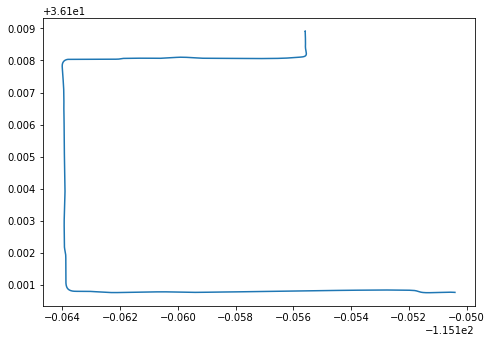

In [94]:
# Нарисовали траекторию по координатам (чтобы видеть, как двигалась машина)
%matplotlib inline
import matplotlib.pyplot as plt
y = lat_list
x = lon_list
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y)